In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Example data as a string
data = """
50.379    8.0288    4.6130    3.4430
60.210    8.0590    4.6269    3.4518
70.041    8.0527    4.6177    3.4519
79.871    8.0462    4.6084    3.4520
89.702    8.0397    4.5992    3.4521
99.533    8.0325    4.5898    3.4520
109.364    8.0256    4.5807    3.4520
119.195    8.0192    4.5718    3.4520
129.026    8.0122    4.5627    3.4520
138.857    8.0049    4.5535    3.4518
148.688    7.9981    4.5447    3.4518
158.519    7.9905    4.5357    3.4515
168.350    7.9839    4.5271    3.4514
178.180    7.9768    4.5184    3.4512
188.011    7.9699    4.5097    3.4511
197.842    7.9628    4.5010    3.4509
207.673    7.9554    4.4922    3.4506
217.504    7.9487    4.4837    3.4504
227.335    7.9412    4.4748    3.4501
237.166    7.9334    4.4659    3.4497
246.997    7.9267    4.4576    3.4494
256.828    7.9199    4.4493    3.4491
266.659    7.9113    4.4394    3.4488
276.489    7.9041    4.4312    3.4484
286.320    7.8981    4.4233    3.4481
296.151    7.8917    4.4152    3.4477
305.982    7.8850    4.4069    3.4472
315.813    7.8785    4.3988    3.4469
325.644    7.8717    4.3905    3.4464
335.475    7.8667    4.3828    3.4460
345.306    7.8603    4.3750    3.4457
355.137    7.8536    4.3667    3.4452
364.968    7.8478    4.3591    3.4448
374.798    7.8411    4.3508    3.4444
384.629    7.8341    4.3424    3.4438
394.460    7.8275    4.3341    3.4434
404.291    7.8213    4.3265    3.4429
414.122    7.8151    4.3184    3.4424
423.953    7.8082    4.3101    3.4419
433.784    7.8019    4.3020    3.4415
443.615    7.7953    4.2939    3.4409
466.434    7.8245    4.3024    3.4491
489.253    7.8527    4.3103    3.4571
512.073    7.8803    4.3182    3.4650
534.892    7.9072    4.3259    3.4727
557.711    7.9332    4.3331    3.4803
580.530    7.9595    4.3406    3.4880
603.350    7.9844    4.3475    3.4954
626.169    8.0103    4.3551    3.5029
648.988    8.0349    4.3620    3.5103
671.807    8.0602    4.3692    3.5178
694.627    8.0845    4.3761    3.5251
717.446    8.1087    4.3829    3.5324
740.265    8.1329    4.3898    3.5398
763.084    8.1568    4.3967    3.5470
785.904    8.1822    4.4044    3.5545
808.723    8.2058    4.4112    3.5618
831.542    8.2300    4.4182    3.5691
854.361    8.2546    4.4258    3.5766
877.181    8.2795    4.4335    3.5843
900.000    8.3048    4.4415    3.5920
916.660    8.3235    4.4475    3.5978
933.320    8.3428    4.4539    3.6038
949.979    8.3609    4.4597    3.6094
966.639    8.3827    4.4675    3.6162
983.299    8.4051    4.4759    3.6231
999.959    8.4274    4.4842    3.6301
1016.619    8.4500    4.4920    3.6378
1033.278    8.4766    4.5039    3.6458
1049.938    8.5323    4.5434    3.6567
1066.598    8.5545    4.5494    3.6657
1083.258    8.5725    4.5539    3.6728
1099.918    8.5885    4.5578    3.6790
1116.577    8.6167    4.5695    3.6884
1133.237    8.7675    4.6637    3.7290
1149.897    8.9782    4.7951    3.7844
1166.557    9.0103    4.8102    3.7940
1183.217    9.0262    4.8147    3.7998
1199.876    9.0422    4.8193    3.8055
1216.536    9.0566    4.8240    3.8103
1233.196    9.0733    4.8287    3.8164
1249.856    9.0880    4.8332    3.8216
1266.516    9.1018    4.8378    3.8262
1283.175    9.1184    4.8424    3.8325
1299.835    9.1321    4.8471    3.8371
1316.495    9.1457    4.8518    3.8417
1333.155    9.1628    4.8561    3.8487
1349.815    9.1770    4.8609    3.8536
1366.474    9.1901    4.8655    3.8581
1383.134    9.2031    4.8700    3.8625
1399.794    9.2163    4.8746    3.8669
1416.454    9.2474    4.8911    3.8751
1433.114    9.2850    4.9096    3.8862
1449.774    9.3248    4.9319    3.8966
1466.433    9.3637    4.9539    3.9068
1483.093    9.4045    4.9774    3.9181
1499.753    9.4443    5.0005    3.9291
1516.413    9.4818    5.0223    3.9396
1533.073    9.4948    5.0269    3.9443
1549.732    9.5073    5.0313    3.9485
"""

# Load data into a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)
df.columns = ['Output', 'Input1', 'Input2', 'Input3']

<ipython-input-23-84d759e375fa>:107: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)


In [24]:
X = df[['Input1', 'Input2', 'Input3']]  # Input features
y = df['Output']  # Output variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 233.53201123752928
R^2 Score: 0.9988487033946215


In [28]:
new_data = np.array([[9.5073,5.0313,3.9485]])  # Example new input
predicted_output = model.predict(new_data)
print(f"Predicted Output: {predicted_output[0]}")

Predicted Output: 1512.7499879035377


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Standardize the output variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the model on scaled data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Mean Squared Error (Scaled): {mse_scaled}")
print(f"R^2 Score (Scaled): {r2_scaled}")

Mean Squared Error (Scaled): 0.0010740312113272136
R^2 Score (Scaled): 0.9988487033946215


In [30]:
new_data = np.array([[9.5073,5.0313,3.9485]])  # Example new input
predicted_output = model.predict(new_data)
print(f"Predicted Output: {predicted_output[0]}")

Predicted Output: 8.368684959832406


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
new_data = np.array([[9.5073, 5.0313, 3.9485]])  # Example new input
new_data_scaled = scaler_X.transform(new_data)
predicted_output_scaled = model.predict(new_data_scaled)
# Reshape predicted_output_scaled to a 2D array
predicted_output_scaled = predicted_output_scaled.reshape(-1, 1)
predicted_output = scaler_y.inverse_transform(predicted_output_scaled)
print(f"Predicted Output: {predicted_output[0]}")

Predicted Output: [1512.7499879]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
print(f"Mean Squared Error (Scaled): {mse_scaled}")
print(f"R^2 Score (Scaled): {r2_scaled}")

Mean Squared Error (Scaled): 0.0010740312113272136
R^2 Score (Scaled): 0.9988487033946215


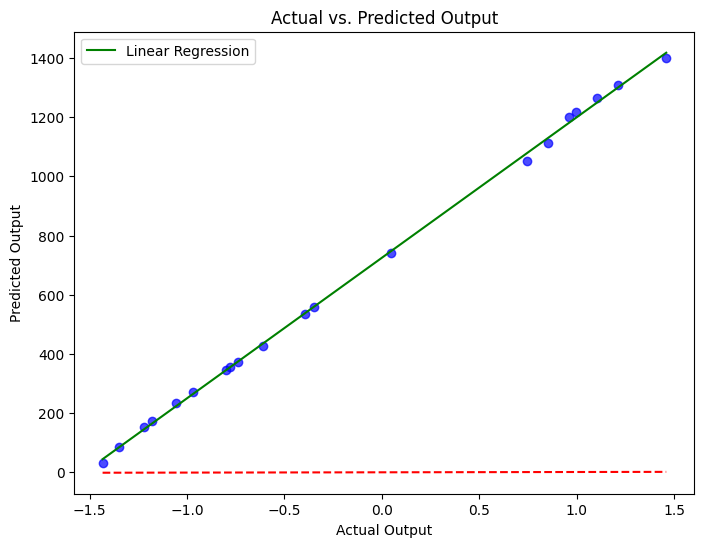

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test (actual output) and y_pred (predicted output)

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Calculate linear regression line
slope, intercept = np.polyfit(y_test, y_pred, 1)
x_line = np.array([min(y_test), max(y_test)])
y_line = slope * x_line + intercept

# Plot linear regression line
plt.plot(x_line, y_line, color='green', label='Linear Regression')

# Set labels, title, and legend
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Actual vs. Predicted Output")
plt.legend()

# Display the plot
plt.show()

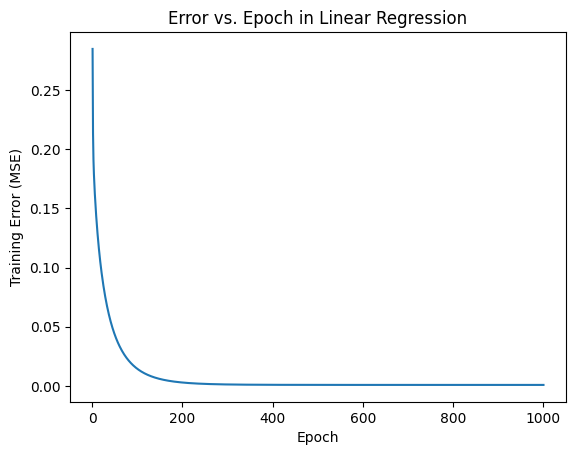

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, y_train (training data)

# Create an SGDRegressor (Stochastic Gradient Descent Regressor)
# with max_iter set to the desired number of epochs
model = SGDRegressor(max_iter=1000)  # Adjust max_iter as needed

# Initialize lists to store errors for each epoch
train_errors = []

# Train the model with partial_fit to get error after each epoch
for epoch in range(model.max_iter):
    model.partial_fit(X_train, y_train)  # Train for one epoch
    y_pred_train = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_pred_train)
    train_errors.append(train_error)

# Plot the training error over epochs
plt.plot(range(1, model.max_iter + 1), train_errors)
plt.xlabel("Epoch")
plt.ylabel("Training Error (MSE)")
plt.title("Error vs. Epoch in Linear Regression")
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

# Assuming you have X_scaled, y_scaled, and your model (LinearRegression)

scores = cross_val_score(model, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')
# Use 'neg_mean_squared_error' for scoring since cross_val_score works with scores to maximize

# Convert scores to positive MSE
mse_scores = -scores

print(f"Cross-validation MSE scores: {mse_scores}")
print(f"Average MSE: {mse_scores.mean()}")

Cross-validation MSE scores: [4.14666562e-03 9.96434912e-05 4.56691471e-05 1.78526540e-03
 1.02440419e-02]
Average MSE: 0.003264257107733189


In [37]:
new_data = np.array([[9.5510,5.0650,3.9585]])  # Example new input
new_data_scaled = scaler_X.transform(new_data)
predicted_output_scaled = model.predict(new_data_scaled)
# Reshape predicted_output_scaled to a 2D array
predicted_output_scaled = predicted_output_scaled.reshape(-1, 1)
predicted_output = scaler_y.inverse_transform(predicted_output_scaled)
print(f"Predicted Output: {predicted_output[0]}")

Predicted Output: [1505.69208754]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Assuming you have your scaler_X object

# Load and preprocess new data (same as before)
# ... (code from previous response to load new_df, X_new, y_new) ...

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters
tree_model.fit(X_scaled, y_scaled)  # Using scaled training data

# Make predictions on scaled new data
y_pred_tree_scaled = tree_model.predict(X_new_scaled)

# Inverse transform predictions to original scale
y_pred_tree = scaler_y.inverse_transform(y_pred_tree_scaled.reshape(-1, 1))

# Evaluate the model on the new dataset
mse_tree = mean_squared_error(y_new, y_pred_tree)
r2_tree = r2_score(y_new, y_pred_tree)

print(f"Decision Tree - Mean Squared Error (New Data): {mse_tree}")
print(f"Decision Tree - R^2 Score (New Data): {r2_tree}")

Decision Tree - Mean Squared Error (New Data): 7242.922244333337
Decision Tree - R^2 Score (New Data): 0.7444354693766329


In [39]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Assuming you have scaler_X and scaler_y

# Load and preprocess new data (same as before)
# ... (code from previous response to load new_df, X_new, y_new) ...

# Create and train the SVR model
svr_model = SVR(kernel='rbf')  # You can adjust the kernel and other hyperparameters
svr_model.fit(X_scaled, y_scaled)  # Using scaled training data

# Make predictions on scaled new data
y_pred_svr_scaled = svr_model.predict(X_new_scaled)

# Inverse transform predictions to original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

# Evaluate the model on the new dataset
mse_svr = mean_squared_error(y_new, y_pred_svr)
r2_svr = r2_score(y_new, y_pred_svr)

print(f"SVR - Mean Squared Error (New Data): {mse_svr}")
print(f"SVR - R^2 Score (New Data): {r2_svr}")

SVR - Mean Squared Error (New Data): 435.5930437762511
SVR - R^2 Score (New Data): 0.9846302185747504


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded your data into 'df' and defined X, y, X_scaled, y_scaled, etc.

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)  # Apply to scaled data

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_scaled)

# Make predictions on scaled new data
X_new_poly = poly.transform(X_new_scaled)  # Apply to scaled new data
y_pred_poly_scaled = poly_model.predict(X_new_poly)

# Inverse transform predictions to original scale
y_pred_poly = scaler_y.inverse_transform(y_pred_poly_scaled.reshape(-1, 1))

# Evaluate the model on the new dataset
mse_poly = mean_squared_error(y_new, y_pred_poly)
r2_poly = r2_score(y_new, y_pred_poly)

print(f"Polynomial Regression (Degree 3) - Mean Squared Error (New Data): {mse_poly}")
print(f"Polynomial Regression (Degree 3) - R^2 Score (New Data): {r2_poly}")


# Comparing with other models:
# ... (Add the code for Linear Regression, Decision Tree, and SVR as before) ...

# Create a comparison table
models = ['Linear Regression', 'Decision Tree', 'Support Vector Regression', 'Polynomial Regression (Degree 3)']
mse_values = [mse_scaled, mse_tree, mse_svr, mse_poly]  # Assuming you have calculated these values
r2_values = [r2_scaled, r2_tree, r2_svr, r2_poly]    # Assuming you have calculated these values

comparison_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R^2': r2_values})
print("\nComparison of Models:")
print(comparison_df)

Polynomial Regression (Degree 3) - Mean Squared Error (New Data): 50.05461624365819
Polynomial Regression (Degree 3) - R^2 Score (New Data): 0.9982338365545963

Comparison of Models:
                              Model          MSE       R^2
0                 Linear Regression     0.001074  0.998849
1                     Decision Tree  7242.922244  0.744435
2         Support Vector Regression   435.593044  0.984630
3  Polynomial Regression (Degree 3)    50.054616  0.998234


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Make sure to import StandardScaler


# New data as a string
new_data_str = """
46.770    8.0124    4.6043    3.4386
58.389    8.0635    4.6306    3.4524
70.008    8.0728    4.6311    3.4556
81.627    8.0686    4.6224    3.4563
93.246    8.0642    4.6137    3.4570
104.865    8.0598    4.6051    3.4577
116.485    8.0545    4.5961    3.4581
128.104    8.0499    4.5876    3.4588
139.723    8.0453    4.5791    3.4594
151.342    8.0408    4.5708    3.4599
162.961    8.0359    4.5623    3.4605
174.580    8.0312    4.5540    3.4610
186.199    8.0260    4.5457    3.4614
197.818    8.0210    4.5373    3.4619
209.437    8.0157    4.5291    3.4622
221.057    8.0111    4.5210    3.4627
232.676    8.0066    4.5130    3.4632
244.295    8.0015    4.5049    3.4635
255.914    7.9970    4.4971    3.4640
267.533    7.9911    4.4885    3.4642
279.152    7.9866    4.4807    3.4646
290.771    7.9818    4.4729    3.4649
302.390    7.9753    4.4638    3.4653
314.009    7.9701    4.4556    3.4655
325.629    7.9665    4.4484    3.4658
337.248    7.9618    4.4407    3.4661
348.867    7.9586    4.4339    3.4664
360.486    7.9542    4.4264    3.4665
372.105    7.9498    4.4188    3.4668
383.724    7.9461    4.4117    3.4670
395.343    7.9416    4.4041    3.4672
406.962    7.9377    4.3967    3.4675
418.581    7.9336    4.3894    3.4677
430.201    7.9292    4.3819    3.4679
441.820    7.9253    4.3748    3.4680
453.439    7.9211    4.3672    3.4683
465.058    7.9172    4.3599    3.4685
476.677    7.9122    4.3522    3.4686
488.296    7.9083    4.3448    3.4688
499.915    7.9039    4.3373    3.4690
511.534    7.9003    4.3302    3.4693
530.958    7.9226    4.3365    3.4757
550.381    7.9456    4.3433    3.4824
569.804    7.9673    4.3494    3.4888
589.227    7.9887    4.3553    3.4951
608.651    8.0101    4.3612    3.5014
628.074    8.0310    4.3671    3.5077
647.497    8.0526    4.3733    3.5142
"""  # Added the missing value in the last row

# Load new data into DataFrame
new_df = pd.read_csv(StringIO(new_data_str), delim_whitespace=True, header=None)
new_df.columns = ['Output', 'Input1', 'Input2', 'Input3']

# Separate features and target
X_new = new_df[['Input1', 'Input2', 'Input3']]
y_new = new_df['Output']

# Scale the new input features using the previously fitted scaler
X_new_scaled = scaler_X.transform(X_new)  # Use the scaler_X object from your training data

# Make predictions on the scaled new data
y_pred_new_scaled = model.predict(X_new_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred_new = scaler_y.inverse_transform(y_pred_new_scaled.reshape(-1, 1))  # Reshape to 2D array

# Evaluate the model on the new dataset (you can use the same metrics as before)
from sklearn.metrics import mean_squared_error, r2_score

mse_new = mean_squared_error(y_new, y_pred_new)
r2_new = r2_score(y_new, y_pred_new)

print(f"Mean Squared Error (New Data): {mse_new}")
print(f"R^2 Score (New Data): {r2_new}")

Mean Squared Error (New Data): 68.02960456112298
R^2 Score (New Data): 0.9975995940075487


<ipython-input-40-1ed4a9432931>:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  new_df = pd.read_csv(StringIO(new_data_str), delim_whitespace=True, header=None)
